# EEG data from basic sensory task in Schizophrenia

Authors: Karl Jääts, Mihkel Kruusi, Siim K. Koger

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib notebook

In [5]:
demo = pd.read_csv("data/demographic.csv")
# demographic.csv columns have space as a first character.. remove it!
demo.columns = [col.replace(' ', '') for col in demo.columns]
erp_data = pd.read_csv("data/ERPdata.csv")

ERP = erp_data.merge(demo, on='subject')

ERP.group.replace(to_replace={0: 'Control', 1: 'Schizo'}, inplace=True)
ERP = ERP.drop(ERP.columns[5:11], axis=1)

### Baseline correction

In [6]:
ERP = ERP[(ERP.time_ms >= -100) & (ERP.time_ms <= 300)].groupby(['group', 'condition', 'time_ms']).mean()

### Preparing data

In [7]:
display(ERP[:3])
ERP.loc[(slice(None),1), ['Fz', 'FCz', 'Cz']] = ERP.loc[(slice(None),1), ['Fz', 'FCz', 'Cz']] - ERP.loc[(slice(None),3), ['Fz', 'FCz', 'Cz']].values
ERP = ERP.drop(index=3, level=1)
ERP.reset_index()
display(ERP[:3])

subject        Fz       FCz        Cz     age  \
group   condition time_ms                                                   
Control 1         -99.6094     25.0  0.455273  0.431357  0.139358  38.375   
                  -98.6328     25.0  0.435204  0.423137  0.108364  38.375   
                  -97.6563     25.0  0.466328  0.454093  0.132008  38.375   

                            education  
group   condition time_ms              
Control 1         -99.6094  15.921875  
                  -98.6328  15.921875  
                  -97.6563  15.921875

subject        Fz       FCz        Cz     age  \
group   condition time_ms                                                   
Control 1         -99.6094     25.0 -0.106914 -0.161320 -0.120676  38.375   
                  -98.6328     25.0 -0.135403 -0.165145 -0.168089  38.375   
                  -97.6563     25.0 -0.083589 -0.105603 -0.120451  38.375   

                            education  
group   condition time_ms              
Control 1         -99.6094  15.921875  
                  -98.6328  15.921875  
                  -97.6563  15.921875

In [8]:
ERP=ERP.reset_index()
ERP = pd.melt(ERP, id_vars=['group', 'condition', 'time_ms'], value_vars=['Fz', 'FCz', 'Cz'])
ERP.condition.replace(to_replace={1: 'Button tone', 2: 'Playback'}, inplace=True)
ERP.head()

,group,condition,time_ms,variable,value
0,Control,Button tone,-99.6094,Fz,-0.106914
1,Control,Button tone,-98.6328,Fz,-0.135403
2,Control,Button tone,-97.6563,Fz,-0.083589
3,Control,Button tone,-96.6797,Fz,-0.056245
4,Control,Button tone,-95.7031,Fz,-0.012324


In [31]:
# It was mentioned that on average Schizophrenia patients have lower level of
# education. Here we can see that gender and ages are quite similar between two groups
# but education is really a bit lower when it comes to Schizophrenia patients.

dummy_demo = demo.copy()
dummy_demo.group.replace(to_replace={0: 'Control', 1: 'Schizo'}, inplace=True)

gender_frame = pd.DataFrame(data={'gender': dummy_demo.gender, 'group': dummy_demo.group})
display(gender_frame.groupby(['gender','group']).size())
print('\n _____________________________ \n')

print('Control subjects')
age_edu_frame = pd.DataFrame(data={'education': dummy_demo.education, 'group': dummy_demo.group, 'age': dummy_demo.age})
display(age_edu_frame[dummy_demo.group=='Control'].describe())

print('Schizophrenia patients')
age_edu_frame = pd.DataFrame(data={'education': dummy_demo.education, 'group': dummy_demo.group, 'age': dummy_demo.age})
display(age_edu_frame[dummy_demo.group=='Schizo'].describe())

gender  group  
 F      Control     6
        Schizo      8
 M      Control    26
        Schizo     41
dtype: int64


 _____________________________ 

Control subjects


,education,age
count,32.000000,32.000000
mean,15.921875,38.375000
std,1.959713,13.918542
min,12.000000,22.000000
25%,15.000000,24.750000
50%,16.000000,38.500000
75%,17.000000,52.250000
max,19.000000,63.000000


Schizophrenia patients


,education,age
count,49.00000,49.000000
mean,13.55102,40.020408
std,1.95588,13.483771
min,9.00000,19.000000
25%,12.00000,27.000000
50%,13.00000,41.000000
75%,16.00000,50.000000
max,16.00000,63.000000


<IPython.core.display.Javascript object>


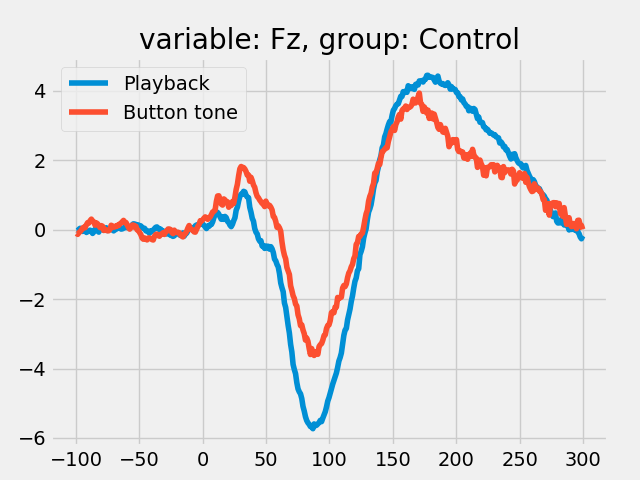

<IPython.core.display.Javascript object>


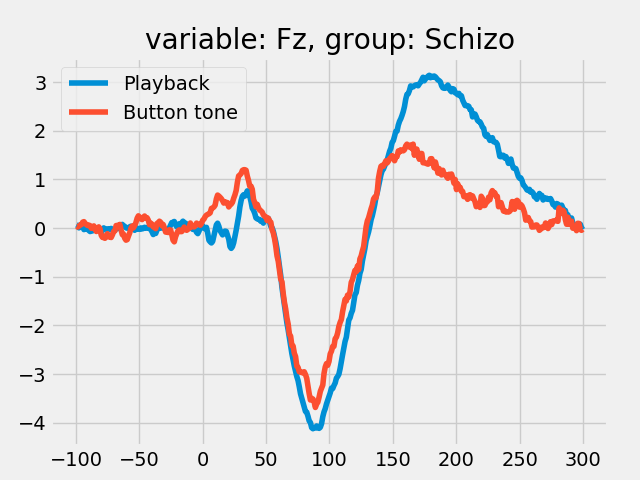

<IPython.core.display.Javascript object>


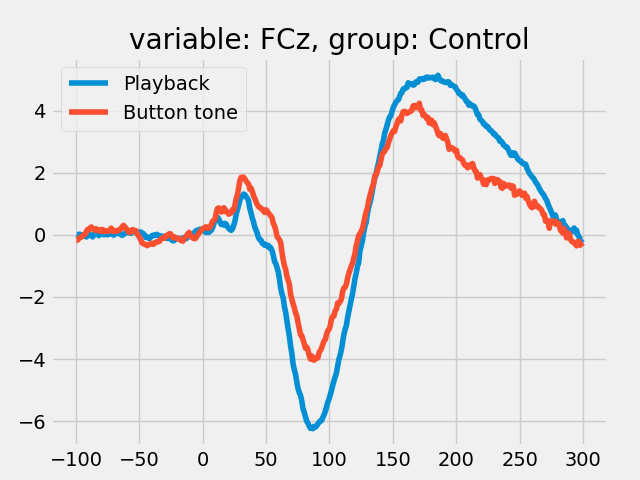

<IPython.core.display.Javascript object>


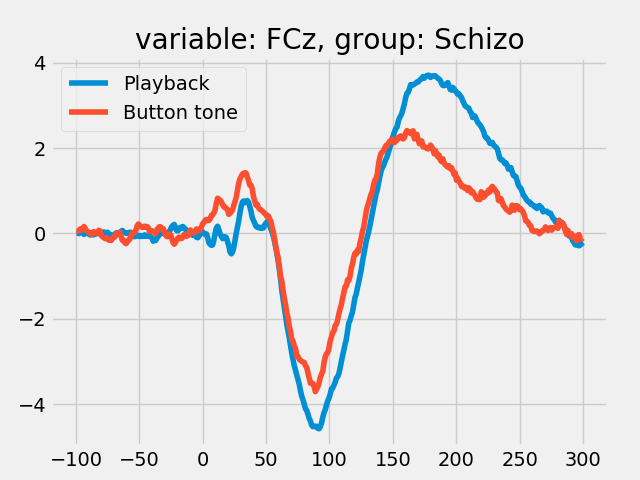

<IPython.core.display.Javascript object>


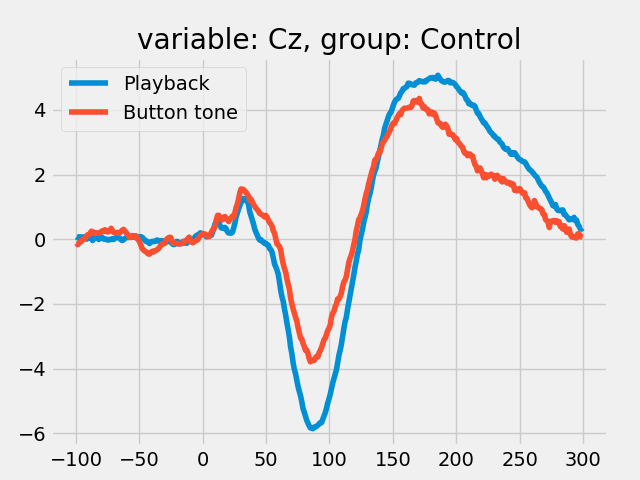

<IPython.core.display.Javascript object>


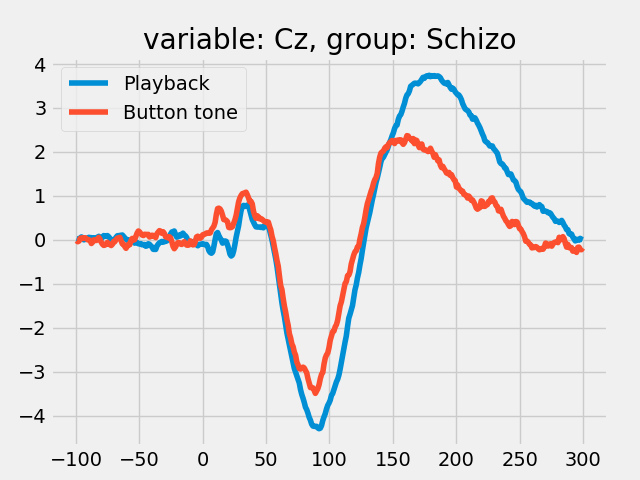

In [25]:
plt.style.use('fivethirtyeight')
ERP['variable'].unique()
PB=ERP[ERP['condition']=='Playback']
BT=ERP[ERP['condition']=='Button tone']
for v in ERP['variable'].unique():
    for g in ERP['group'].unique():
        cond = {'variable': v, 'group': g}
        PBc = PB.loc[(PB['variable'] == cond['variable']) & (PB['group'] == cond['group']), ['time_ms','value']]
        BTc = BT.loc[(BT['variable'] == cond['variable']) & (BT['group'] == cond['group']), ['time_ms','value']]
        plt.figure()
        plt.plot(PBc['time_ms'], PBc['value'])
        plt.plot(BTc['time_ms'], BTc['value'])
        plt.title('variable: {variable}, group: {group}'.format(**cond))
        plt.legend(['Playback','Button tone'])

In [14]:
# Both N100 and P200 are of lower amplitude for Schizophrenia patients compared to controls.
# This seems to correspond to a discovery made by the same authors in a different study https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5008052/
# What they suggested based on their own and other research is that the patients with apathy may allocate too few
# resources to processing external (auditory) events and too many resources to internal events.


# During the button tone the N100 responses are actually very similar between both groups. 
# What differs though is the playback amplitude.
# It can be clearly seen that for the control subjects there is a suppression at N1 comparing playback and button sound.
# What's interesting though is that the difference comes from higher amplitude of N1 during playback not a higher suppression of N1 durin button press.
# From that I'd say that it's not that the patients don't suppress the signal during button press, rather it's that
# during passive listening they don't allocate as much resources to processing than control subjects (as was also found in the research above).
# That means that Schizophrenia patients constantly focus more to themselves but control subjects normally also focus on external world.

# Now, this result repeats the conclusion that Schizophrenia patients 